# Grafo Legisladores y Textos

## Descripción del dataset

El dataset consiste en relaciones de legisladores entre sí en función de si colaboraron en el desarrollo de un proyecto de algún tipo.

Cada nodo representa un Legislador, identificada por su apellido. El enlace entre dos nodos implica que existió algún proyecto Legisladores



In [1]:
import numpy as np
import pandas as pd
from itertools import combinations

## Librería de grafos
import networkx as nx

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('talk')

Crear base del grafo con textos


In [2]:
# Creo el grafo
G = nx.Graph()

In [3]:
 nodos=[
  ('Abraham',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':60}),
  ('Alesandri',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':69}),
  ('Altamirano',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':53}),
  ('Ambrosio',{'genero':'Masculino','bloque':'Juntos por el Cambio','edad':62}),
  ('Arduh',{'genero':'Masculino','bloque':'Juntos por el Cambio','edad':59}),
  ('Argañaras',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':33}),
  ('Argañaraz',{'genero':'Femenino','bloque':'Frente de Izquierda y de los Trabajadores','edad':29}),
  ('Bañuelos',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':53}),
  ('Blangino',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':31}),
  ('Busso',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':28}),
  ('Caffaratti',{'genero':'Femenino','bloque':'Juntos por el Cambio','edad':54}),
  ('Capitani',{'genero':'Masculino','bloque':'Juntos por el Cambio','edad':48}),
  ('Carpintero',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':34}),
  ('Carrillo',{'genero':'Femenino','bloque':'Unión Cívica Radical','edad':59}),
  ('Caserio',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':43}),
  ('Castro',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':74}),
  ('Chamorro',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':42}),
  ('Cid',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':45}),
  ('Cossar',{'genero':'Masculino','bloque':'Unión Cívica Radical','edad':53}),
  ('DeFerrariRueda',{'genero':'Femenino','bloque':'Juntos por el Cambio','edad':63}),
  ('DeLaSota',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':46}),
  ('Echevarria',{'genero':'Femenino','bloque':'MST - Nueva Izquierda','edad':39}),
  ('EslavaG',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':57}),
  ('EslavaE',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':38}),
  ('Fernandez',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':46}),
  ('Fortuna',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':69}),
  ('GaradePanetta',{'genero':'Femenino','bloque':'Unión Cívica Radical','edad':51}),
  ('Garcia',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':68}),
  ('GarciaElorrio',{'genero':'Masculino','bloque':'Encuentro Vecinal Córdoba','edad':67}),
  ('Giraldi',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':44}),
  ('Gonzalez',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':73}),
  ('Grosso',{'genero':'Masculino','bloque':'Encuentro Vecinal Córdoba','edad':55}),
  ('Gudiño',{'genero':'Femenino','bloque':'Juntos por el Cambio','edad':37}),
  ('Guirardelli',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':33}),
  ('Hak',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':50}),
  ('Irazuzta',{'genero':'Femenino','bloque':'Coalición Cívica ARI','edad':65}),
  ('Iturria',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':60}),
  ('Jure',{'genero':'Masculino','bloque':'Juntos por el Cambio','edad':53}),
  ('Kyshakevych',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':34}),
  ('Labat',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':42}),
  ('Latimori',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':64}),
  ('Lencinas',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':69}),
  ('Limia',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':49}),
  ('Lorenzo',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':48}),
  ('Majul',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':64}),
  ('Maldonado',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':55}),
  ('Mansilla',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':54}),
  ('Manzanares',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':64}),
  ('Marcone',{'genero':'Femenino','bloque':'Encuentro Vecinal Córdoba','edad':70}),
  ('Martinez',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':38}),
  ('Miranda',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':43}),
  ('Nanini',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':47}),
  ('Paleo',{'genero':'Femenino','bloque':'Juntos por el Cambio','edad':35}),
  ('Pereyra',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':65}),
  ('Petrone',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':56}),
  ('Piasco',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':57}),
  ('Pihen',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':75}),
  ('Presas',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':73}),
  ('Ramallo',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':47}),
  ('Recalde',{'genero':'Masculino','bloque':'Juntos por el Cambio','edad':54}),
  ('Rinaldi',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':37}),
  ('Rins',{'genero':'Masculino','bloque':'Unión Cívica Radical','edad':73}),
  ('Ronge',{'genero':'Femenino','bloque':'Juntos por el Cambio','edad':57}),
  ('Rossi',{'genero':'Masculino','bloque':'Unión Cívica Radical','edad':56}),
  ('Rosso',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':49}),
  ('Rufeil',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':38}),
  ('Ruiz',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':46}),
  ('Saieg',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':66}),
  ('Serrano', {'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':47}),
  ('Scorza', {'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':62}),
  ('Suarez',{'genero':'Femenino','bloque':'Hacemos por Córdoba','edad':75}),
  ('Viola',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':42}),
  ('Zorrilla',{'genero':'Masculino','bloque':'Hacemos por Córdoba','edad':58})
]

In [4]:
# Añadimos los nodos al Grafo
G.add_nodes_from(nodos)

In [5]:
# Importamos la información desde la base de datos
sheet_id = '1ixpOQ_lvHCTJzOaPLFwC9N00aB8PSpCHZSaTylqpnNg'
sheet_name = 'EDGES_APE'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

EDGES = pd.read_csv(url)

In [6]:
# Realizamos algunas correcciones
EDGES = EDGES.drop('Tipo', axis=1)

EDGES = EDGES[EDGES['Autor 1'].notna()]

EDGES = EDGES.fillna("")

EDGES = EDGES.astype('str')

EDGES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 0 to 1045
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Autor 1   1021 non-null   object
 1   Autor 2   1021 non-null   object
 2   Autor 3   1021 non-null   object
 3   Autor 4   1021 non-null   object
 4   Autor 5   1021 non-null   object
 5   Autor 6   1021 non-null   object
 6   Autor 7   1021 non-null   object
 7   Autor 8   1021 non-null   object
 8   Autor 9   1021 non-null   object
 9   Autor 10  1021 non-null   object
 10  Autor 11  1021 non-null   object
 11  Autor 12  1021 non-null   object
 12  Autor 13  1021 non-null   object
 13  Autor 14  1021 non-null   object
 14  Autor 15  1021 non-null   object
 15  Autor 16  1021 non-null   object
 16  Autor 17  1021 non-null   object
 17  Autor 18  1021 non-null   object
 18  Autor 19  1021 non-null   object
 19  Autor 20  1021 non-null   object
 20  Autor 21  1021 non-null   object
 21  Autor 22  1021

In [7]:
# Añadimos una columna con todos los autores separados por coma
EDGES['Autores'] = EDGES[['Autor 1','Autor 2','Autor 3','Autor 4','Autor 5','Autor 6','Autor 7','Autor 8','Autor 9','Autor 10',
                          'Autor 11','Autor 12','Autor 13','Autor 14','Autor 15','Autor 16','Autor 17','Autor 18','Autor 19','Autor 20',                          
                          'Autor 21','Autor 22','Autor 23','Autor 24','Autor 25','Autor 26','Autor 27','Autor 28','Autor 29','Autor 30',        
                          'Autor 31','Autor 32','Autor 33','Autor 34','Autor 35','Autor 36','Autor 37','Autor 38','Autor 39','Autor 40',                          
                          'Autor 41','Autor 42','Autor 43','Autor 44','Autor 45','Autor 46','Autor 47']].agg(', '.join, axis=1)
EDGES

,Autor 1,Autor 2,Autor 3,Autor 4,Autor 5,Autor 6,Autor 7,Autor 8,Autor 9,Autor 10,Autor 11,Autor 12,Autor 13,Autor 14,Autor 15,Autor 16,Autor 17,Autor 18,Autor 19,Autor 20,Autor 21,Autor 22,Autor 23,Autor 24,Autor 25,Autor 26,Autor 27,Autor 28,Autor 29,Autor 30,Autor 31,Autor 32,Autor 33,Autor 34,Autor 35,Autor 36,Autor 37,Autor 38,Autor 39,Autor 40,Autor 41,Autor 42,Autor 43,Autor 44,Autor 45,Autor 46,Autor 47,Autores
0,Caserio,Maldonado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Caserio, Maldonado, , , , , , , , , , , , , , ..."
1,Abraham,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Abraham, , , , , , , , , , , , , , , , , , , ,..."
2,Abraham,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Abraham, , , , , , , , , , , , , , , , , , , ,..."
3,Abraham,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Abraham, , , , , , , , , , , , , , , , , , , ,..."
4,Abraham,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Abraham, , , , , , , , , , , , , , , , , , , ,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,Martinez,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Martinez, , , , , , , , , , , , , , , , , , , ..."
1040,Presas,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Presas, , , , , , , , , , , , , , , , , , , , ..."
1041,Caserio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Caserio, , , , , , , , , , , , , , , , , , , ,..."
1042,Garcia Elorrio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Garcia Elorrio, , , , , , , , , , , , , , , , ..."


In [8]:
# Realizamos todas las combinaciones posibles como tuplas y las guardamos en la columna Autores
EDGES['Autores'] = EDGES['Autores'].apply(lambda x: x.split(','))
EDGES['Autores'] = EDGES['Autores'].apply(lambda x: list(combinations(x, 2)))
EDGES = EDGES.explode('Autores')

In [9]:
# Obtenemos la tuplas con dos elementos

edges_prov = list(EDGES['Autores'])
edges= []

for i in edges_prov:
  
  if i[0]==" " or i[1]==" ":
    pass
  
  else:
    j=(i[0].replace(' ','') , i[1].replace(' ','')) # Eliminamos los espacios
    edges.append(j)

edges = list(set(edges))
len(edges)

469

In [10]:
G.add_edges_from(edges)

In [11]:
print(nx.info(G))

Graph with 73 nodes and 469 edges


## Representación del grafo

### Lista de adyacencia

Cada elemento de la lista representa a un nodo, y contiene el conjunto de vecinos del mismo.

In [12]:
def get_adjacency_list(G):
    """
    Construye la lista de adyacencia del grafo G
    """
    adjlist = []
    for v in G.nodes():
        neighbor_set = set(list(G.neighbors(v)))
        adjlist.append((v, neighbor_set))
    return adjlist

def print_adjacency_list(adjlist):
    """
    Imprime la lista de adyacencia en pantalla
    """
    for v, neighbors in adjlist:
        print(f'{v:14} {neighbors}')

adjlist = get_adjacency_list(G)
print('Lista de adyacencia', end='\n\n')
print_adjacency_list(adjlist)

Lista de adyacencia

Abraham        {'Piasco', 'Mansilla', 'Fernandez', 'Rosso', 'Iturria', 'Guirardelli', 'Limia', 'Pereyra', 'Rinaldi', 'Suarez', 'Hak', 'Majul', 'Blangino'}
Alesandri      {'Saieg', 'DeFerrariRueda', 'Caserio', 'Rins', 'Rosso', 'Lencinas', 'Petrone', 'Chamorro', 'Irazuzta', 'Recalde'}
Altamirano     {'Gonzalez', 'Blangino', 'Latimori', 'Bañuelos'}
Ambrosio       {'DeFerrariRueda', 'Fernandez', 'Mansilla', 'Ronge', 'Jure', 'Limia', 'Caffaratti', 'Paleo', 'Ramallo', 'Suarez', 'Chamorro', 'Majul', 'Arduh', 'Capitani', 'Gudiño', 'Recalde'}
Arduh          {'DeFerrariRueda', 'Ambrosio', 'Cid', 'Gonzalez', 'Jure', 'Caffaratti', 'Ronge', 'Paleo', 'Cossar', 'Capitani', 'Gudiño', 'Recalde'}
Argañaras      {'Kyshakevych', 'Blangino', 'Latimori'}
Argañaraz      {'Rossi', 'Echevarria'}
Bañuelos       {'Gonzalez', 'Altamirano', 'Blangino', 'Latimori'}
Blangino       {'Caserio', 'Guirardelli', 'Abraham', 'Hak', 'Castro', 'Piasco', 'Giraldi', 'Miranda', 'Nanini', 'Zorrilla', 'Rinald

### Visualización

In [13]:
# Mapeo de colores  
val_map = {} 
for nodo in nodos:
  if nodo[1]['bloque']=='Hacemos por Córdoba':
    color=0.12
  elif nodo[1]['bloque']=='Juntos por el Cambio':
    color=0.42
  elif nodo[1]['bloque']=='Unión Cívica Radical':
    color=0
  elif nodo[1]['bloque']=='Frente de Izquierda y de los Trabajadores':
    color=0.62
  elif nodo[1]['bloque']=='Encuentro Vecinal Córdoba':
    color=0.33
  elif nodo[1]['bloque']=='Coalición Cívica ARI':
    color=0.74
  elif nodo[1]['bloque']=='MST - Nueva Izquierda':
    color=0.53
  val_map[nodo[0]]=color

values = [val_map.get(node) for node in G.nodes()]

In [14]:
draw_params = dict(
    with_labels=True,               ## Incluye los nombres de los nodos
    edge_color='black',
    width=2,                        ## Espesor de los enlaces
    font_size=15,
    label='Textos aprobados autores',
    pos=nx.kamada_kawai_layout(G)   ## Algoritmo para embeber el grafo en el plano
)

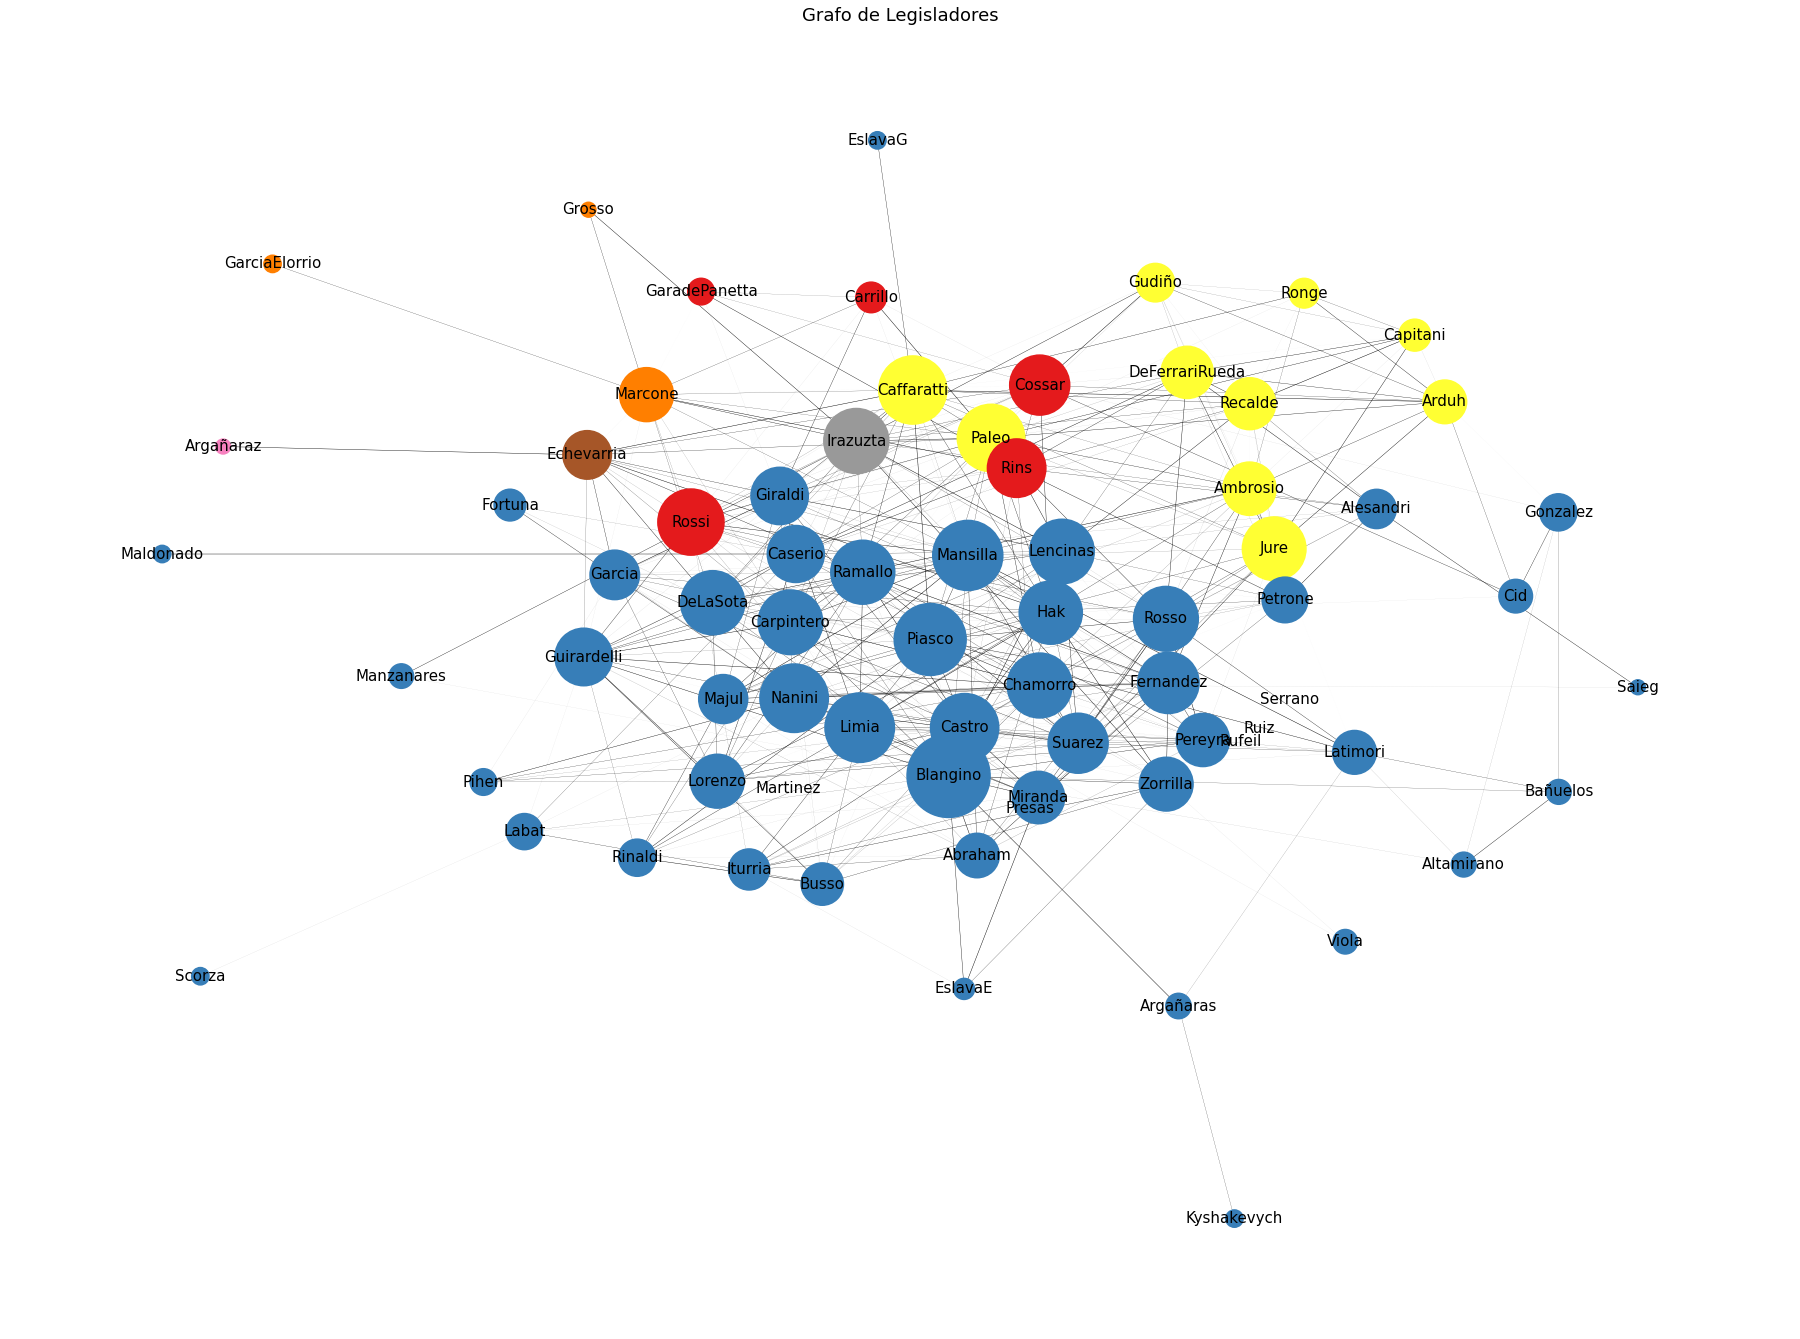

In [26]:
fig, ax = plt.subplots(figsize=(32,24))
ax.set_title('Grafo de Legisladores')
nx.draw(
    G, cmap=plt.get_cmap('Set1'), node_color=values,
    ax=ax,
    **draw_params
)

## Estadísticas de los nodos

Construimos un DataFrame de pandas para almacenar la estadística de los nodos

In [16]:
df = pd.DataFrame(index=list(G.nodes()))
df

""
Abraham
Alesandri
Altamirano
Ambrosio
Arduh
...
Serrano
Scorza
Suarez
Viola


### Distribución de grado

In [17]:
print(G.degree())

[('Abraham', 13), ('Alesandri', 10), ('Altamirano', 4), ('Ambrosio', 16), ('Arduh', 12), ('Argañaras', 3), ('Argañaraz', 2), ('Bañuelos', 4), ('Blangino', 33), ('Busso', 12), ('Caffaratti', 24), ('Capitani', 9), ('Carpintero', 23), ('Carrillo', 7), ('Caserio', 16), ('Castro', 25), ('Chamorro', 23), ('Cid', 6), ('Cossar', 18), ('DeFerrariRueda', 16), ('DeLaSota', 24), ('Echevarria', 15), ('EslavaG', 1), ('EslavaE', 4), ('Fernandez', 22), ('Fortuna', 5), ('GaradePanetta', 6), ('Garcia', 15), ('GarciaElorrio', 1), ('Giraldi', 18), ('Gonzalez', 6), ('Grosso', 2), ('Gudiño', 11), ('Guirardelli', 19), ('Hak', 23), ('Irazuzta', 21), ('Iturria', 10), ('Jure', 21), ('Kyshakevych', 1), ('Labat', 7), ('Latimori', 11), ('Lencinas', 22), ('Limia', 27), ('Lorenzo', 18), ('Majul', 15), ('Maldonado', 1), ('Mansilla', 27), ('Manzanares', 2), ('Marcone', 16), ('Martinez', 0), ('Miranda', 15), ('Nanini', 25), ('Paleo', 24), ('Pereyra', 19), ('Petrone', 13), ('Piasco', 28), ('Pihen', 6), ('Presas', 0), ('

In [18]:
deg_seq = np.array([k for v, k in G.degree()])
df['degree'] = deg_seq

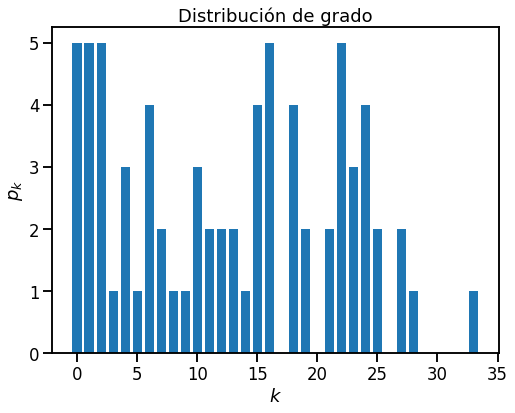

In [19]:
deg_histo = nx.degree_histogram(G)
bins = range(len(deg_histo))

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Distribución de grado')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k$')
ax.bar(bins, deg_histo)
plt.show()

### Centralidad

In [20]:
# Atributos de los nodos
betweenness = nx.betweenness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)
closeness = nx.closeness_centrality(G)
clustering_coefficient = nx.clustering(G)

df['betweenness'] = list(betweenness.values())
df['eigenvector'] = list(eigenvector.values())
df['closeness'] = list(closeness.values())
df['Cws'] = list(clustering_coefficient.values())

In [21]:
# Resumen de información sobre los nodos
columns = ['degree', 'betweenness', 'eigenvector', 'closeness']
data = {}
for col in columns:
    top_leg = df.nlargest(3, columns=[col])[col].index
    data[col] = top_leg
pd.DataFrame(data)

,degree,betweenness,eigenvector,closeness
0,Blangino,Blangino,Piasco,Blangino
1,Piasco,Caffaratti,Blangino,Piasco
2,Limia,Caserio,Mansilla,DeLaSota


Volvemos a graficar, incorporando información sobre nodos y enlaces en el gráfico

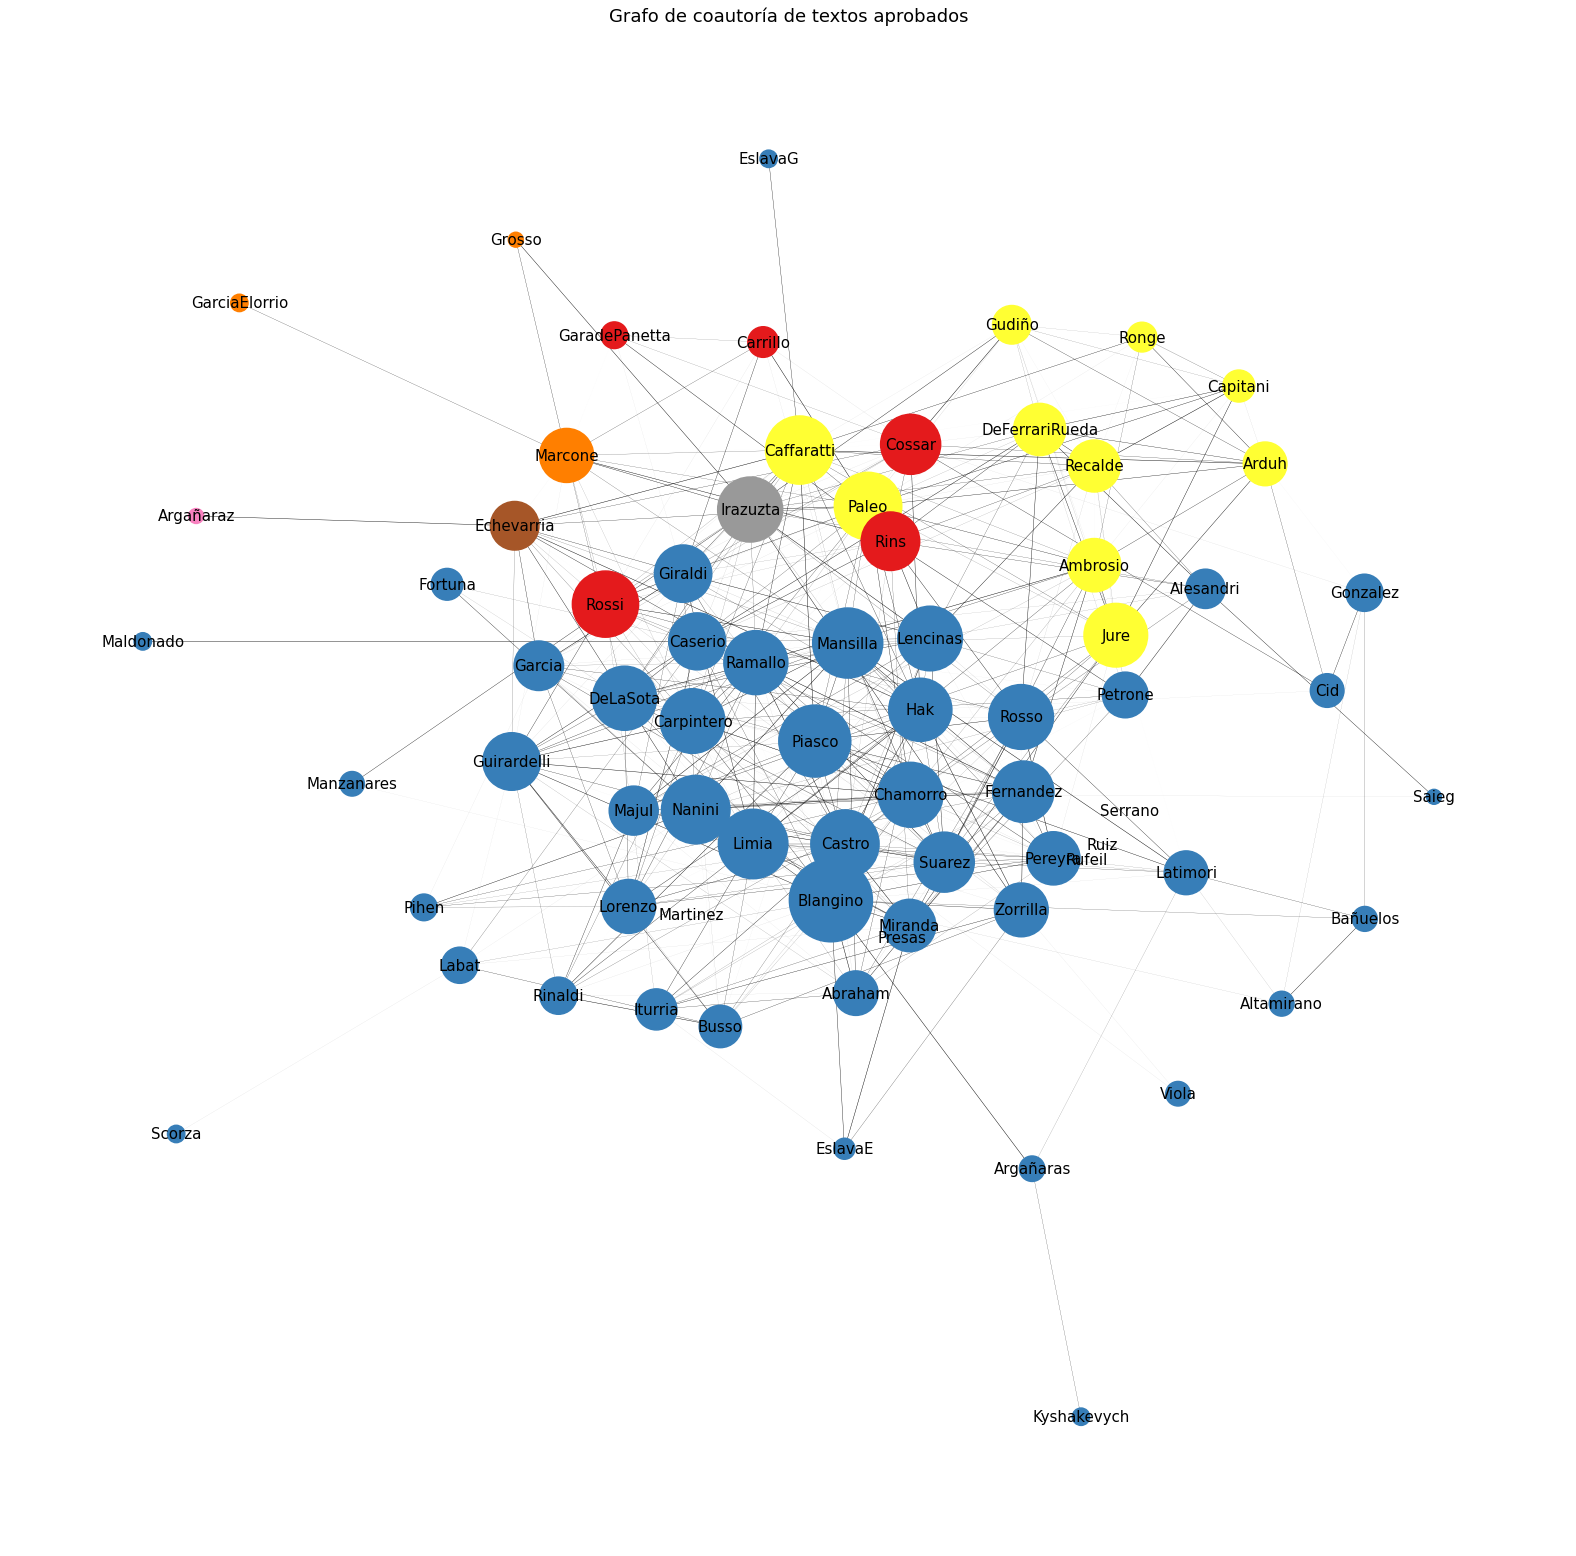

In [22]:
edge_betweenness = np.array(list(nx.eigenvector_centrality(G).values()))

## El ancho de cada link será proporcional a su betweenness
draw_params['width'] = 2*edge_betweenness
## El tamaño del nodo será proporcional a su grado
draw_params['node_size'] = 300*df['degree']*np.exp(-df['Cws'])

fig, ax = plt.subplots(figsize=(28,28))
ax.set_title('Grafo de coautoría de textos aprobados')
nx.draw(
    G, cmap=plt.get_cmap('Set1'), node_color=values,
    ax=ax,
    **draw_params
)